<a href="https://colab.research.google.com/github/aboltCD/aboltCD/blob/main/Regresi%C3%B3n_Lineal_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresiones Lineales

En este notebook haremos predicciones sobre precios de casas en Boston utilizando regresiones lineales y el optimizador SGD. 

Comenzamos por importar las librerías necesarias:

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

Ahora cargamos el dataset de Boston Housing, lo separamos en Features y Target, lo escalamos y dividimos en entrenamiento y prueba (en este caso, utilizamos un 15% de los datos como prueba):

In [25]:
boston = load_boston()
X, y = boston.data, boston.target

X = scale(X)
y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

Ahora entrenamos el modelo (ajustamos la regresión) y sacamos tres métricas de error: R^2, MSE (error cuadrado promedio), RMSE (raíz del error cuadrado promedio)

In [26]:
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.1, n_iter_no_change = 5)
sgdr.fit(X_train, y_train)

score = sgdr.score(X_train, y_train)
print("R-squared:", score)

y_pred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

R-squared: 0.7165333169529446
MSE:  0.24360840479189844
RMSE:  0.4935670215805534


Ahora podemos graficar las diferencias entre las predicciones y valores reales
Nota: los valores no corresponden a precios de casas, ya que han sido escalados y normalizados. Este gráfico indica, para cada punto en el eje x, cual fue la diferencia entre el valor real y la predicción, para dar una intuición de hacia donde estan las desviaciones:

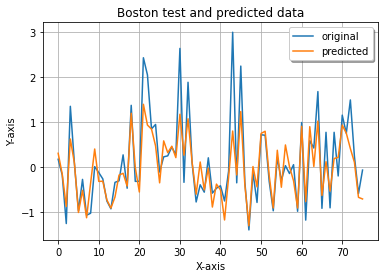

In [27]:
X_ax = range(len(y_test))
plt.plot(X_ax, y_test, label="original")
plt.plot(X_ax, y_pred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 